# Exploring the NSL-KDD Dataset: A Comprehensive Analysis About Intrusion Detection System

## Introduction

In the realm of cybersecurity and network intrusion detection, the NSL-KDD dataset stands as a benchmark for evaluating machine learning models' performance. This dataset, derived from the original KDD Cup 1999 dataset, addresses the limitations and biases present in its predecessor, making it a vital resource for researchers and practitioners in the field of Intrusion Detection System (IDS).

This notebook embarks on a comprehensive exploration of the NSL-KDD dataset, focusing on building and evaluating machine learning models for intrusion detection. The key objectives of this project include:

1. **Importing Libraries:** Essential Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn are imported to facilitate data manipulation, visualization, and model building.

2. **Reading Dataset:** The NSL-KDD dataset is loaded into the environment, laying the foundation for subsequent analyses and model development.

3. **Data Cleaning:** Data cleaning operations address missing values, handle outliers, and ensure the dataset's integrity, preparing it for exploratory data analysis (EDA) and preprocessing stages.

4. **EDA and Visualization:** Exploratory data analysis and visualization techniques provide insights into the dataset's structure, feature distribution, correlations, and potential patterns, aiding in understanding network traffic and intrusion behaviors.

5. **Preprocessing:** Preprocessing techniques such as feature scaling, encoding categorical variables, and data transformation prepare the dataset for model training, ensuring compatibility with machine learning algorithms.

6. **Feature Engineering:** Feature engineering strategies create new features, extract relevant information, and enhance predictive power, refining the dataset for intrusion detection analysis.

7. **Model Building:** 
   - **XGBoost (XGB):** XGBoost is employed as a powerful gradient boosting algorithm known for its high performance in classification tasks. Its ability to handle complex relationships and large datasets makes it a valuable tool for intrusion detection.
   - **Logistic Regression:** Logistic Regression is utilized for its simplicity and interpretability, making it an effective baseline model for binary classification tasks. It provides insights into the linear relationships between features and the target variable, aiding in understanding intrusion detection patterns.
8. **Evaluation:** Model evaluation metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) provide insights into model performance and efficacy in detecting network intrusions.

9. **Feature Importance:** Feature importance analysis identifies key factors contributing to intrusion detection, enabling prioritization of features and enhancing model interpretability.

10. **Results:** The analysis presents strengths and limitations of different machine learning models, discusses insights gained, and outlines recommendations for improving network intrusion detection strategies.

This exploration into the NSL-KDD dataset navigates through the complexities of network intrusion detection, leveraging machine learning techniques to fortify defenses against cyber threats.



# 1. IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# 2. READ DATASET

In [2]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.1 ADJUST COLUMNS

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

We don't have the names of the features from the given dataset so i adjust the columns from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.2 INSIGHTS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

We have different types of dtypes, we need encoding, doesn't seem like we have null values but we will check

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


There are some outlier values, but we will check if it's too much

# 3. DATA CLEANING

# 3.1 NULL VALUES

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset doesn't contain any null value

In [8]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [9]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

# 3.2 DUPLICATES

In [10]:
df.duplicated().sum()

0

Dataset doesn't contain any duplicated row

# 3.3 OUTLIERS

In [11]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

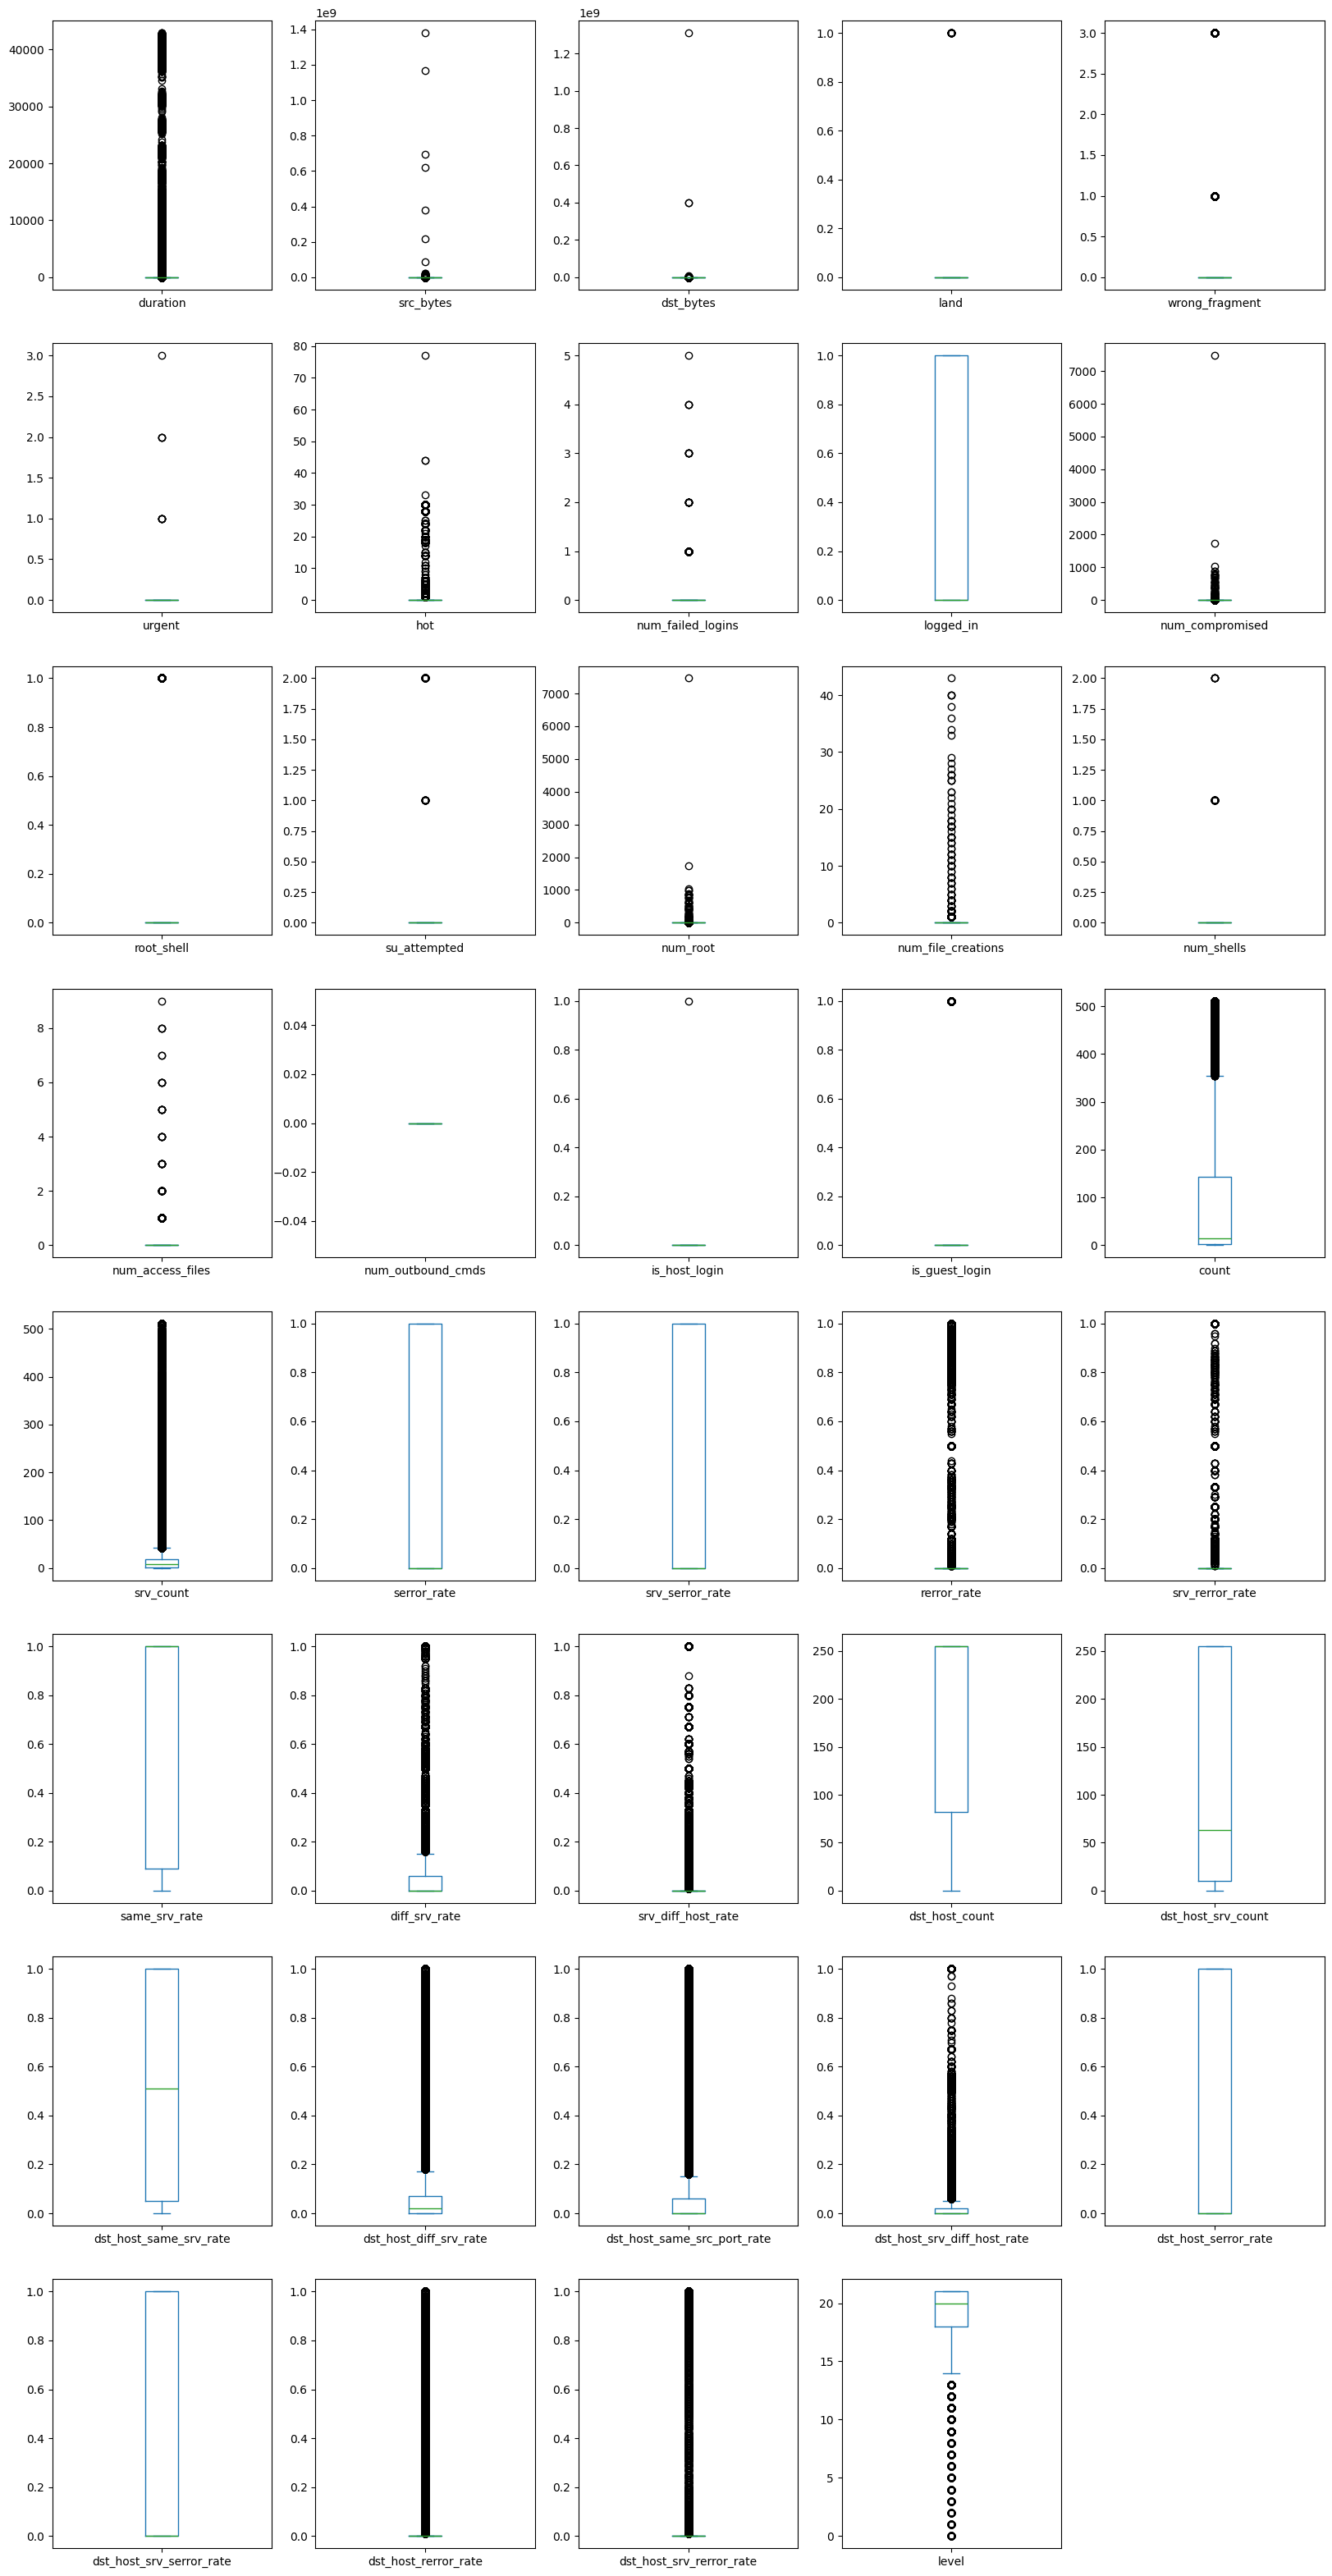

In [14]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

There is no too much outlier to misslead the model so i will not drop the outliers

# 3.4 CLASSIFY ATTACK OR NOT

In [15]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

In [16]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

# 4. EDA - VISUALIZATIONS

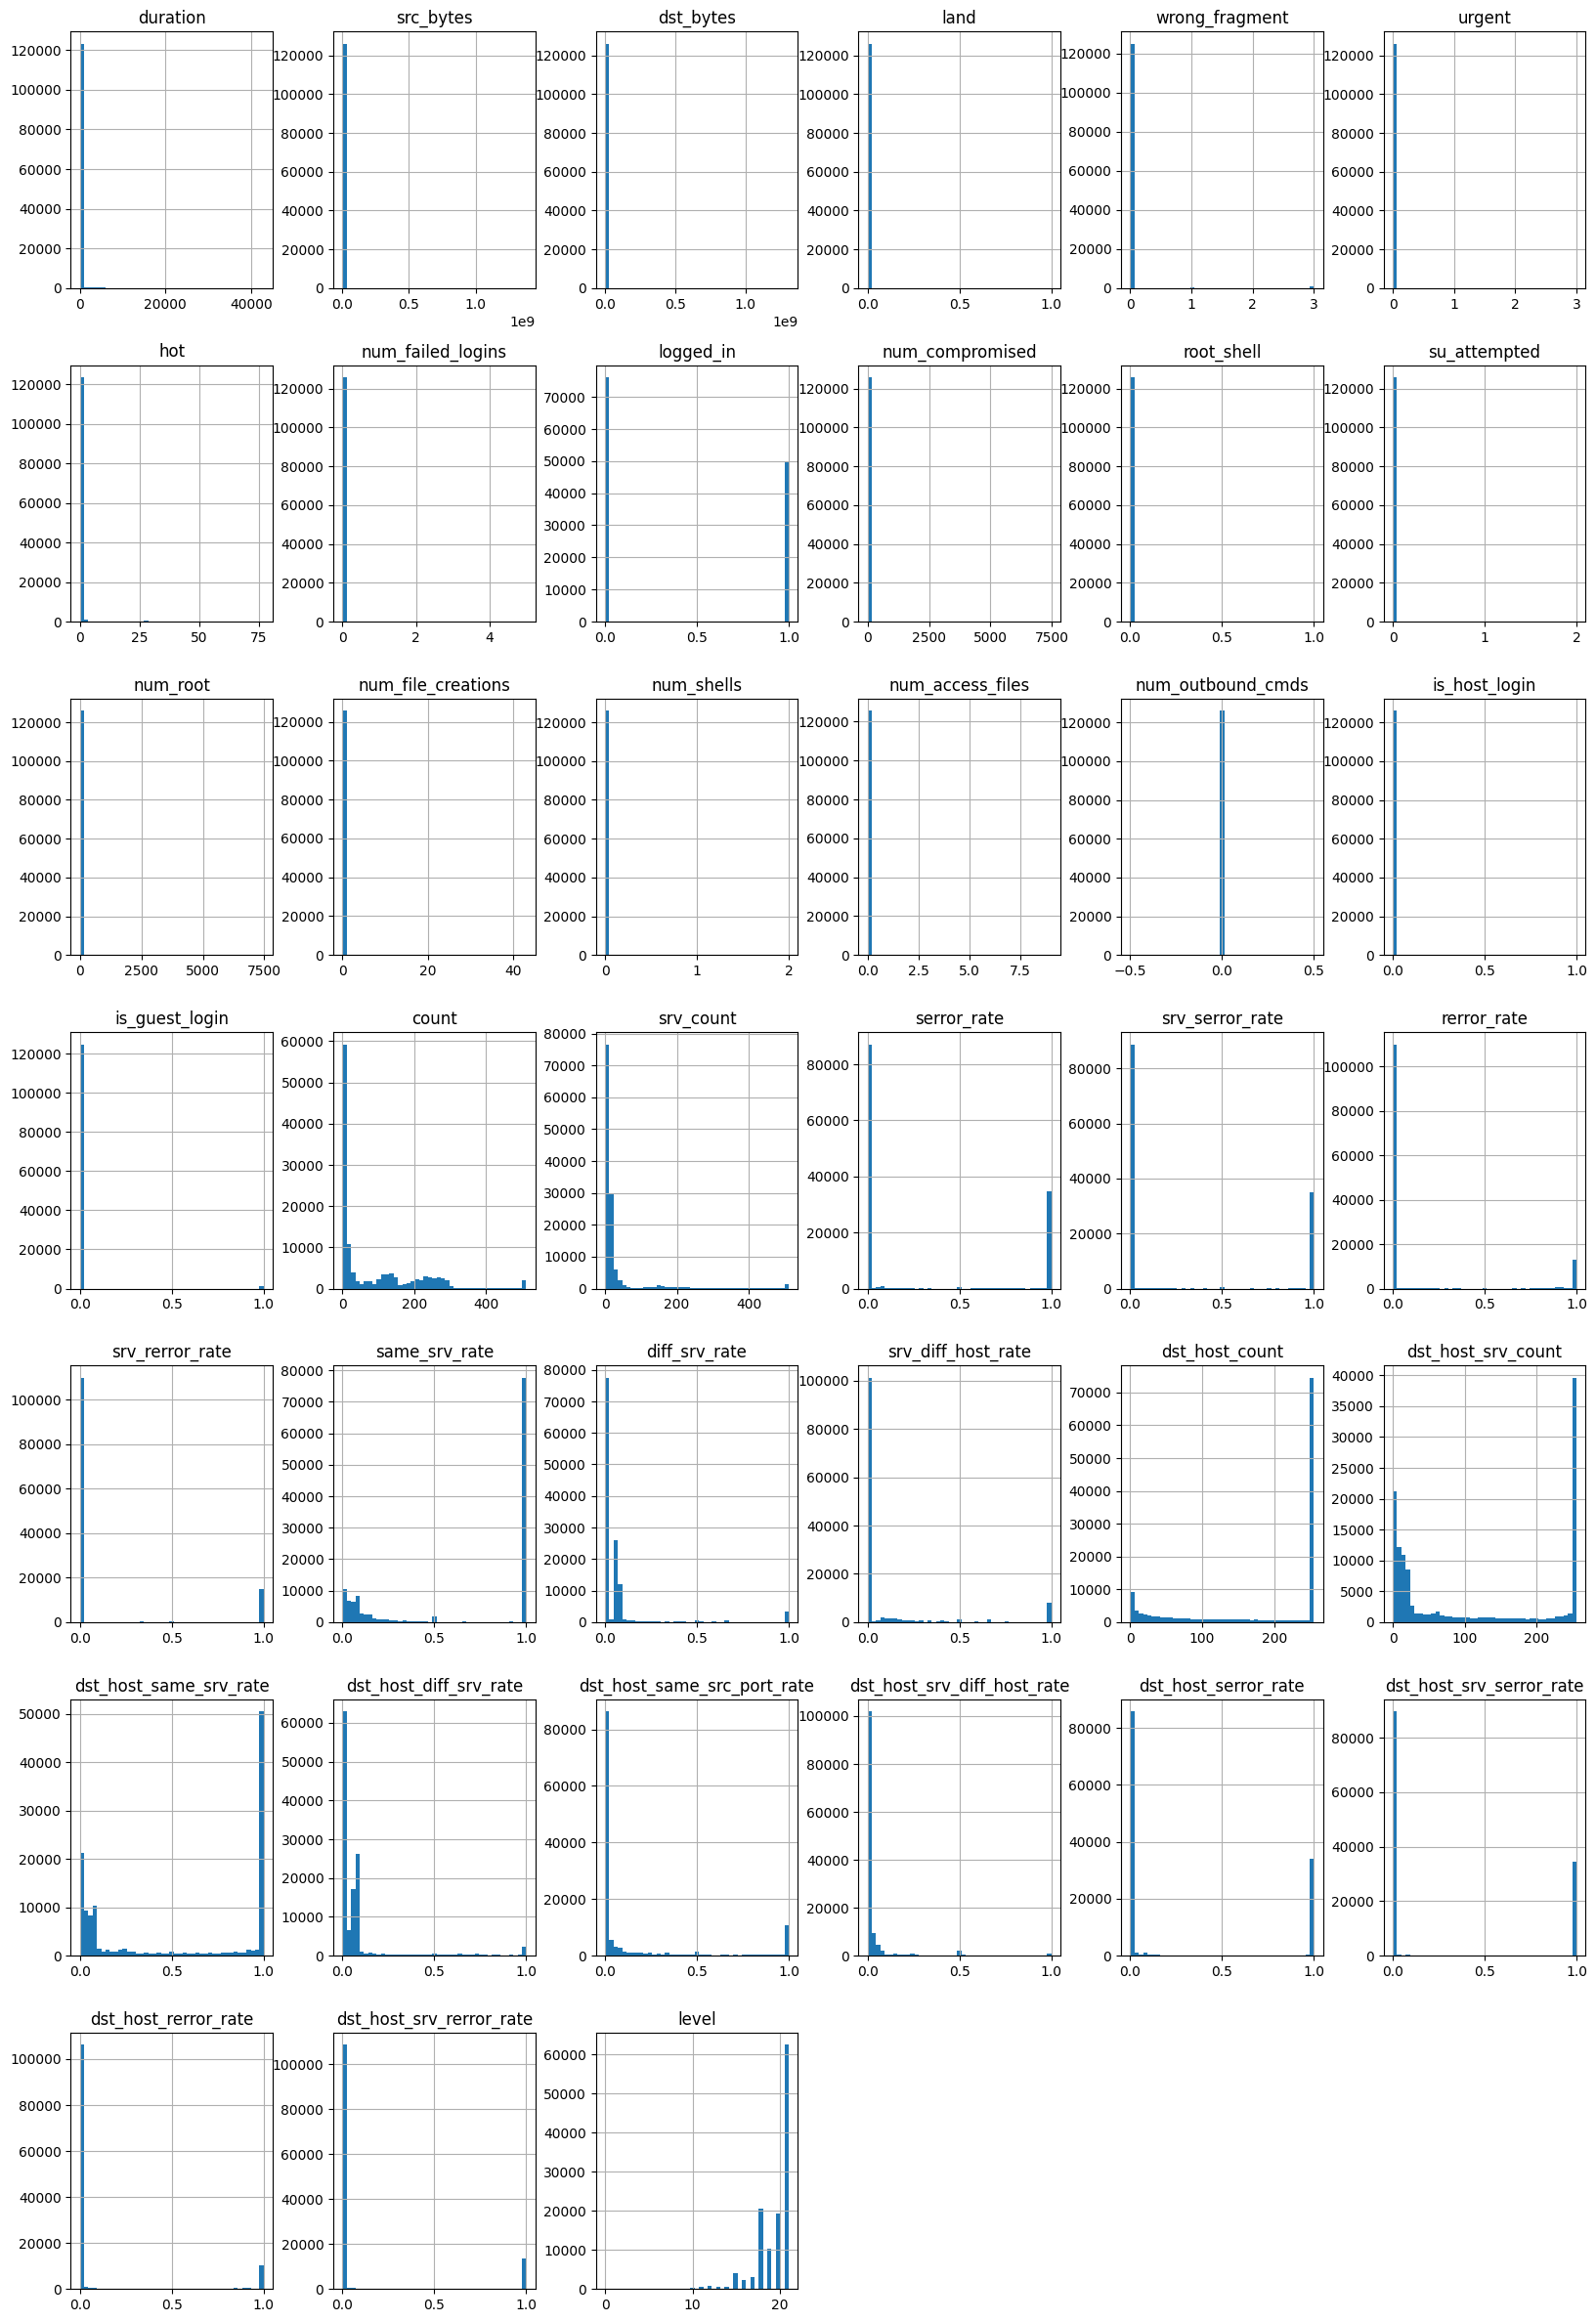

In [17]:
df.hist(bins=43,figsize=(20,30));

General visualization in order to get insights

# 4.1 Protocol Type

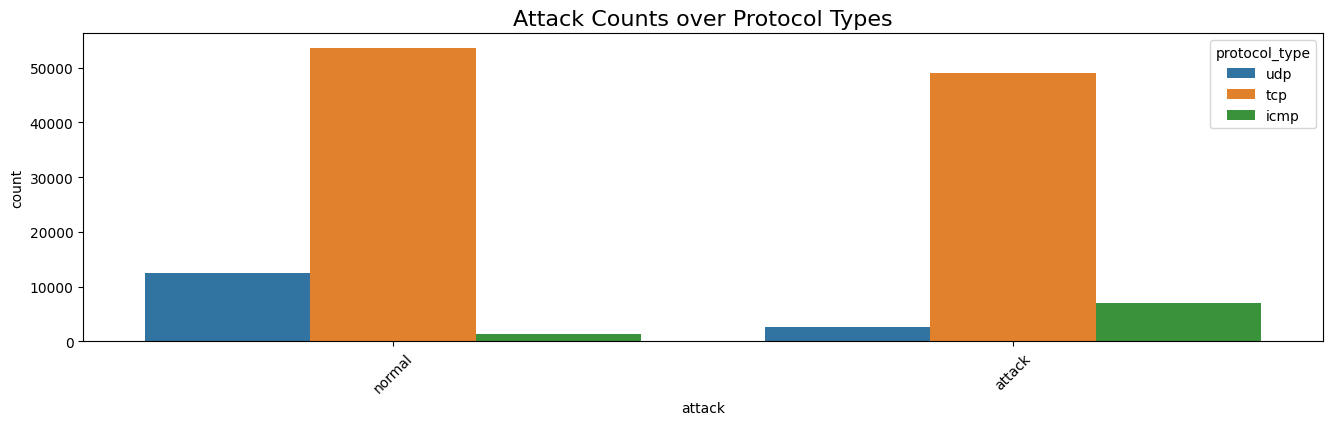

In [18]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [19]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [20]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

# 4.2 Service used general

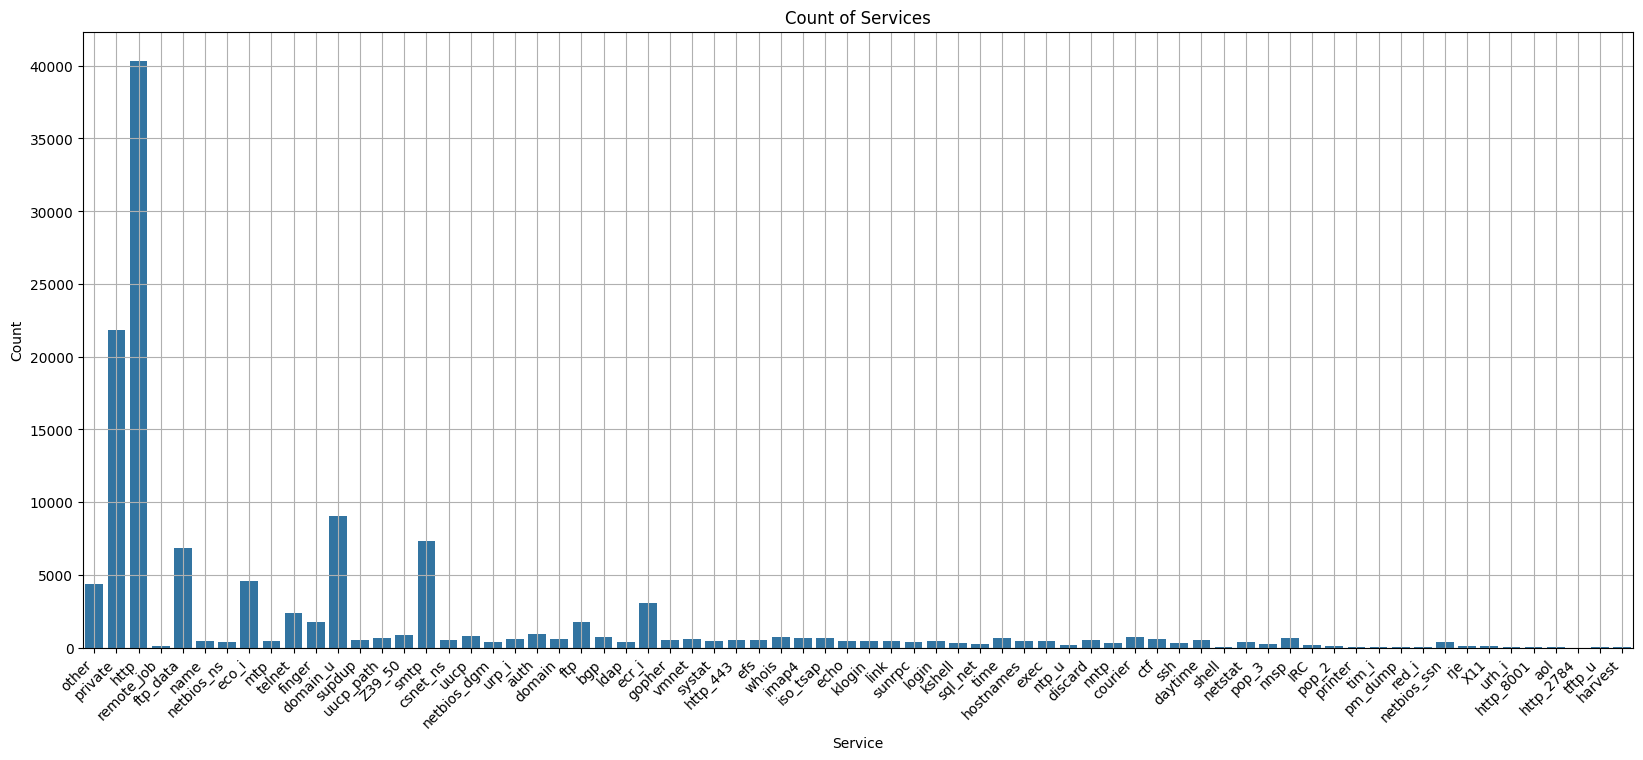

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [22]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

# 4.3 Service used effect on attacks

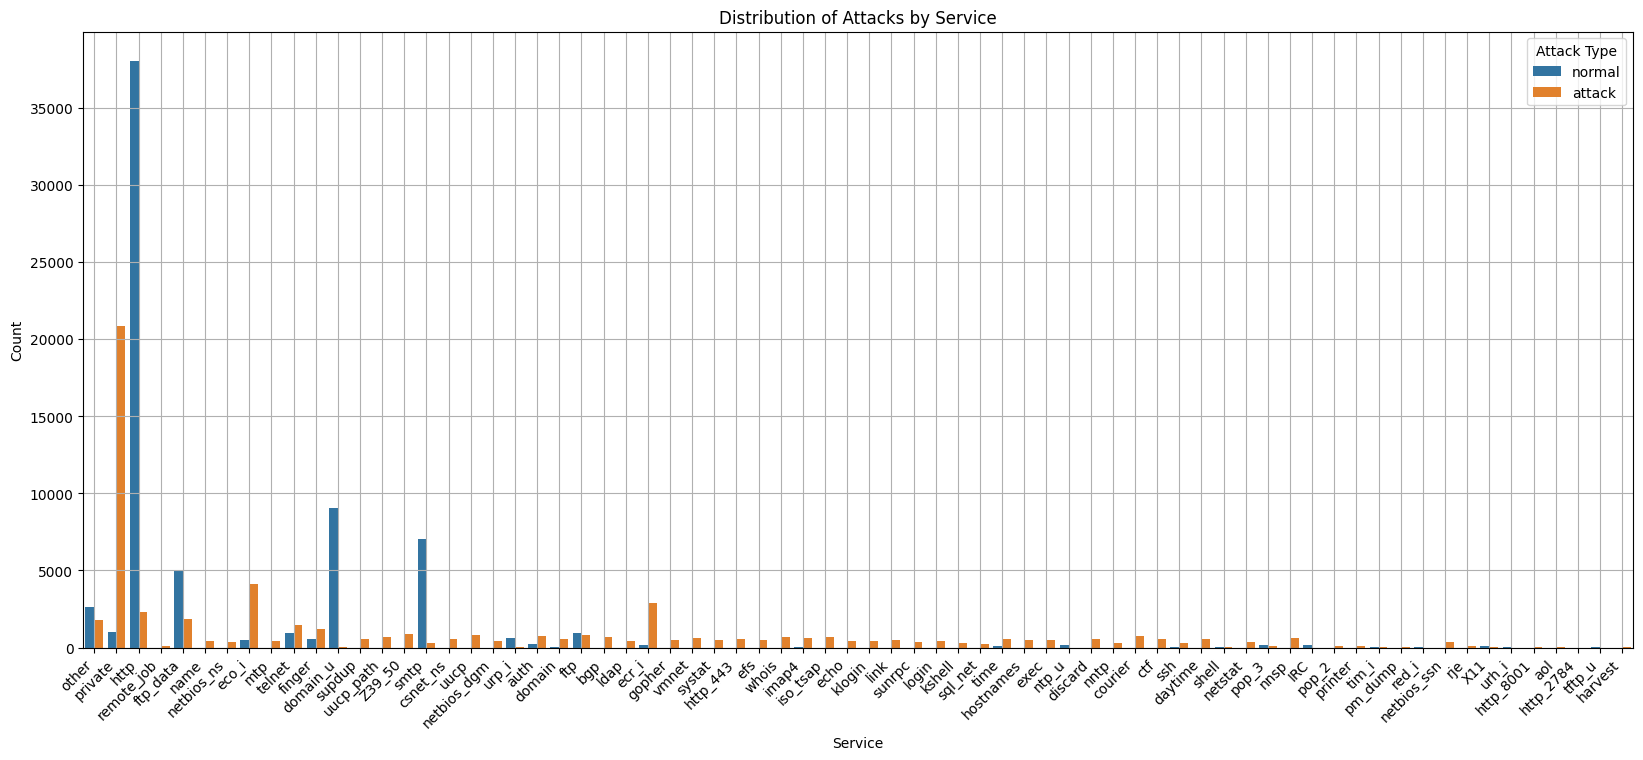

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


In [24]:
#we can see that private attacks is most common service 

# 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

<Figure size 1200x800 with 0 Axes>

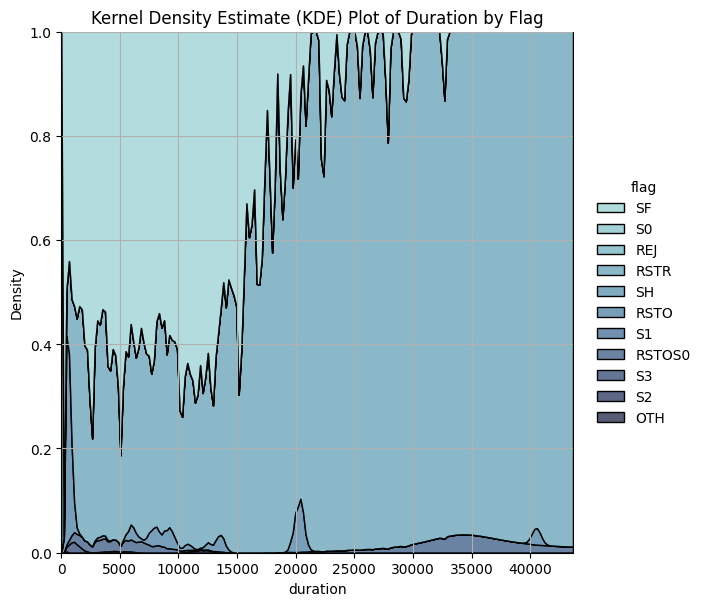

In [25]:

plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


# 4.5 Distribution of Attack Types by Guest Login

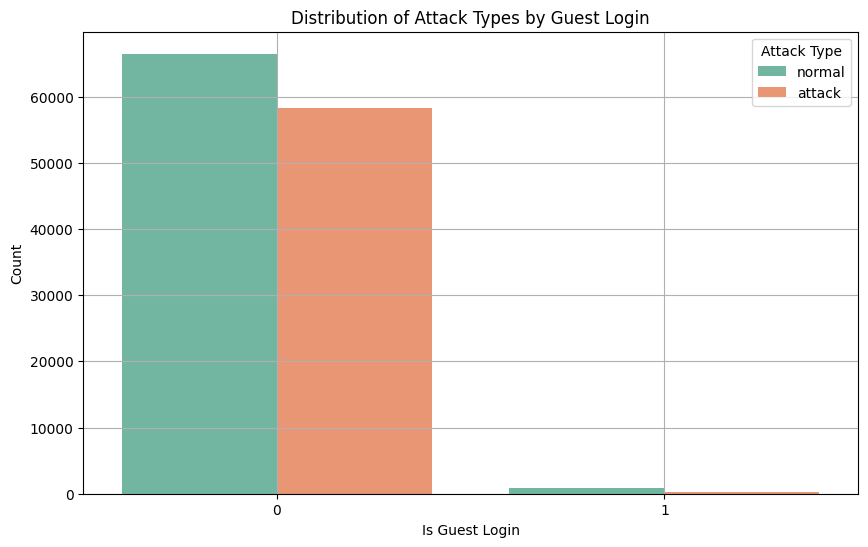

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

we can clearly say that attacks are comes when guest is not login

# 5. PREPROCESSING

# 5.1 ENCODING

In [27]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

# 5.2 TRAIN-TEST-SPLIT

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

In [30]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# 5.3 Feature Engineering

In [31]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                     0.567
service                       0.469
dst_bytes                     0.439
flag                          0.368
same_srv_rate                 0.366
diff_srv_rate                 0.361
dst_host_srv_count            0.336
dst_host_same_srv_rate        0.310
logged_in                     0.291
dst_host_serror_rate          0.287
dst_host_diff_srv_rate        0.284
dst_host_srv_serror_rate      0.281
serror_rate                   0.277
srv_serror_rate               0.268
count                         0.262
dst_host_srv_diff_host_rate   0.187
level                         0.153
dst_host_count                0.144
dst_host_same_src_port_rate   0.130
srv_diff_host_rate            0.098
srv_count                     0.065
dst_host_srv_rerror_rate      0.064
protocol_type                 0.054
rerror_rate                   0.041
srv_rerror_rate               0.038
dst_host_rerror_rate          0.035
duration                      0.025
wrong_fragment              

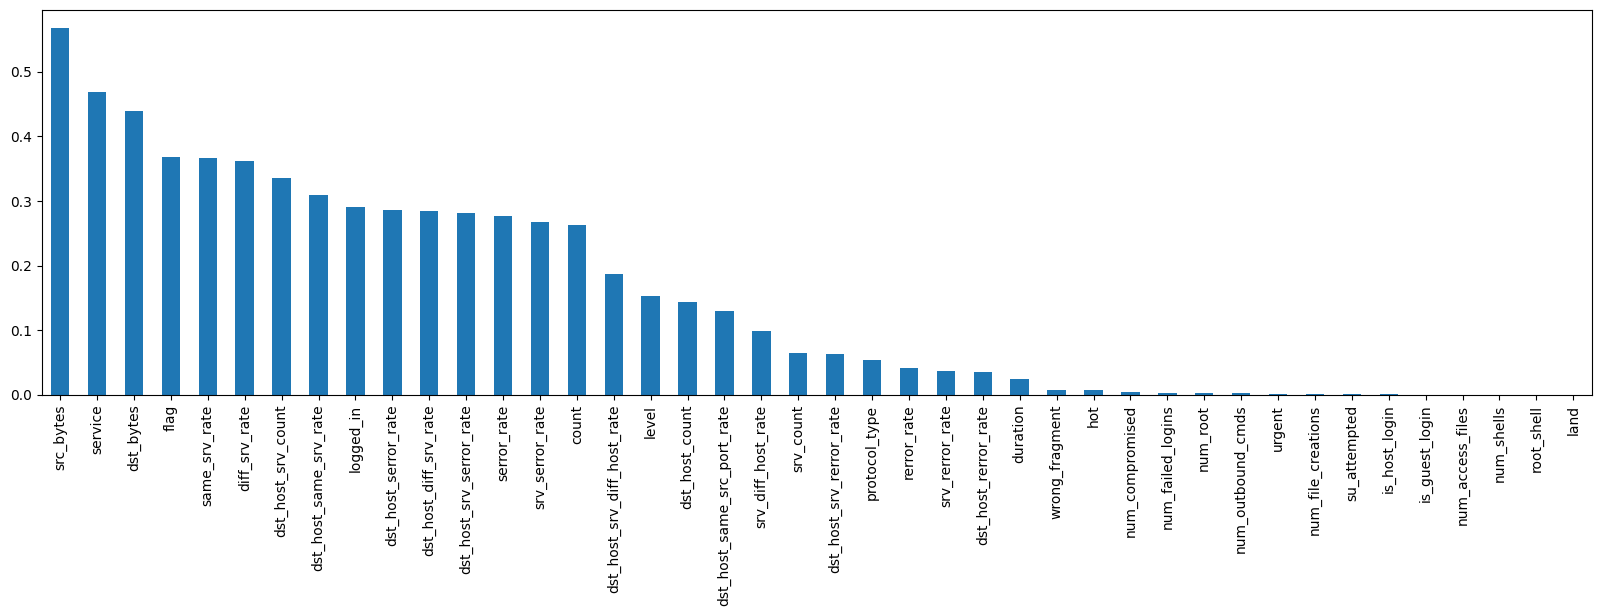

In [32]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

# 5.4 Feature Selection

In [33]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [34]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

# 5.5 Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

# 6. MODEL BUILD

In [36]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [37]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [38]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [39]:
Logistic = Logistic_model.fit(X_train,y_train)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [41]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [42]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[5421  407]
 [ 233 6537]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49316  3486]
 [ 2140 58432]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



In [43]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[5816   12]
 [   8 6762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52746    56]
 [   29 60543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



So we can see that ensemble methods such as xgboost,adaboost,gradientboosts has more accurace scores over logistic regression in bigger datasets.

It doesn't neccessary but we will do hyperparameter tuning in order to fit the model with best parameters, i would like to remember that xgboost has cross-validation has itself

# 6.1 HYPERPARAMETER TUNING

In [44]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [46]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

MemoryError: Unable to allocate 2.59 MiB for an array with shape (22675, 15) and data type float64

In [ ]:
XGB_grid_model.best_score_

0.9983093070545325

In [ ]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

# 6.2 FINAL MODEL

In [ ]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 6.3 EVALUATION

In [ ]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])


In [ ]:
xgb_auc

0.9999736158858219

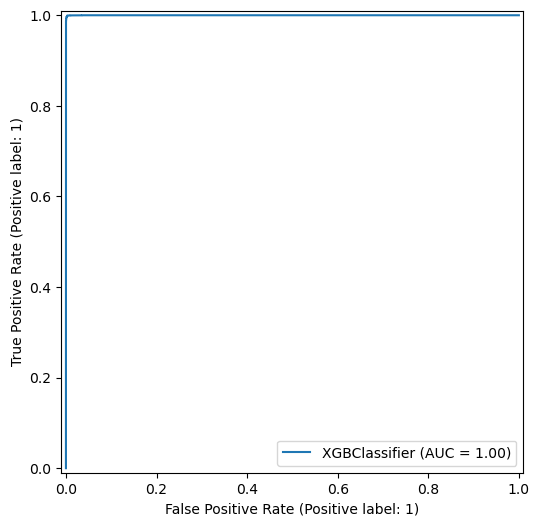

In [58]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [65]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set

[[5811   17]

 [   6 6764]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      5828

           1       1.00      1.00      1.00      6770



    accuracy                           1.00     12598

   macro avg       1.00      1.00      1.00     12598

weighted avg       1.00      1.00      1.00     12598





Train_Set

[[52684   118]

 [   37 60535]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     52802

           1       1.00      1.00      1.00     60572



    accuracy                           1.00    113374

   macro avg       1.00      1.00      1.00    113374

weighted avg       1.00      1.00      1.00    113374




# 7. FEATURE IMPORTANCE

In [71]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
src_bytes,0.186
logged_in,0.167
protocol_type,0.120
count,0.098
dst_bytes,0.095
serror_rate,0.059
srv_serror_rate,0.054
num_compromised,0.044
hot,0.034
wrong_fragment,0.032


In [72]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [75]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

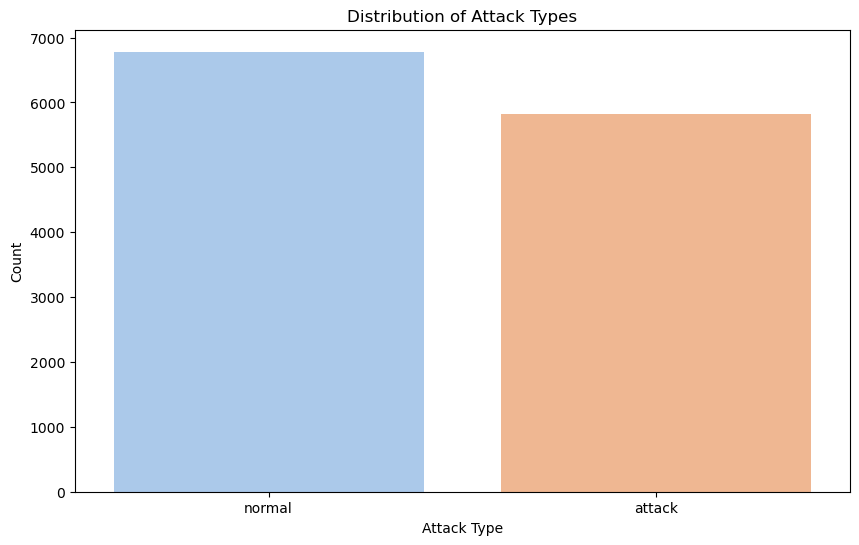

In [78]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()